## Libraries

In [1]:
import pandas as pd
from IPython.display import Image
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as normal
from scipy.stats import skew,kurtosis

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import linear_model

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')


In [3]:
houses_data = train_data.append(test_data,ignore_index=True)#.reset_index(drop=True)
np.unique(houses_data.index)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


array([   0,    1,    2, ..., 2916, 2917, 2918], dtype=int64)

In [4]:
houses_data.shape

(2919, 81)

In [5]:
houses_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

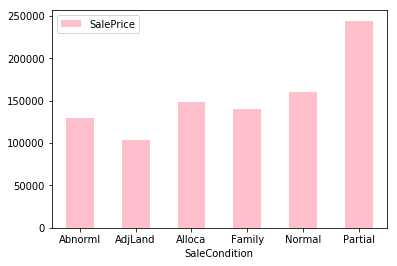

In [6]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

In [7]:
houses_data['SaleCondition_d']=np.where(houses_data['SaleCondition']!='Partial',0,1)
#test_data['SaleCondition_d']=np.where(test_data['SaleCondition']!='Partial',0,1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

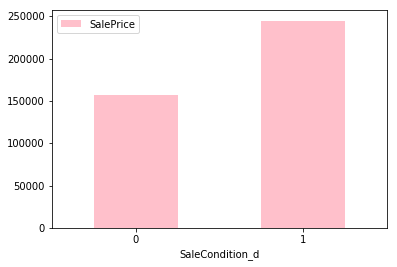

In [8]:
SaleCondition_pivot=houses_data.pivot_table(index='SaleCondition_d',
values='SalePrice',aggfunc=np.median)
SaleCondition_pivot.plot(kind='bar',color='pink')
plt.xticks(rotation=0)

There are different ways to handle the missing values(**nan** values). The first one is to **drop the columns** with missing values. The second one is to **drop the rows** with the missing values, and third is to **impute** those missing values.

### Imputing missing values


In [9]:
houses_data.PoolQC.describe()

count     10
unique     3
top       Ex
freq       4
Name: PoolQC, dtype: object

In [10]:
houses_data.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

PoolQC: Pool quality can have different values:

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
    
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

In [11]:
houses_data.PoolQC=houses_data.PoolQC.fillna("None")

In [12]:
houses_data.MiscFeature.describe()

count      105
unique       4
top       Shed
freq        95
Name: MiscFeature, dtype: object

In [13]:
houses_data.MiscFeature.value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

In [14]:
houses_data.MiscFeature=houses_data.MiscFeature.fillna("None")

In [15]:
houses_data.Alley.describe()

count      198
unique       2
top       Grvl
freq       120
Name: Alley, dtype: object

In [16]:
houses_data.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Since NA means there is no pool at the house. We will replace it with 'None' and then it will be used to make dummy variables and encoding categorical variable into a binary one.

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       

In [17]:
houses_data.Fence=houses_data.Fence.fillna("None")

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [18]:
houses_data.FireplaceQu=houses_data.FireplaceQu.fillna("None")

These 5 above we replaced NA WITH NONE cause it means that that attribute values is not present aj lpepse malo

In [19]:
none_cols=["Alley","BsmtQual","BsmtCond","BsmtExposure",'BsmtFinType1''',"BsmtFinType2",
"FireplaceQu","GarageType","GarageFinish","GarageCond","PoolQC","Fence"]
for column in none_cols:
    houses_data[column]=houses_data[column].fillna("None")

In [20]:
x=houses_data.isnull().sum()
x[x>0]

BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageQual       159
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [21]:
x=houses_data.isnull().sum()
x[x>0]

BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Functional         2
GarageArea         1
GarageCars         1
GarageQual       159
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

GarageYrBlt       

The influence of the information is important. If NA is replaced with the 0 it means that there is NO garage therefore year of building it can't exist! And also for GarageArea and GarageCars...if we assume that NA means that there is no garage, then area of garage is 0 and number of garage cars is also 0.

In [22]:
zero_cols=["GarageCars","GarageArea","GarageYrBlt"]
for column in zero_cols:
    houses_data[column]=houses_data[column].fillna(0)

UKRALA PA IZMENI!!

In [23]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
houses_data["LotFrontage"] = houses_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [24]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    houses_data[col] = houses_data[col].fillna(0)

In [25]:
houses_data.Electrical.describe()

count      2918
unique        5
top       SBrkr
freq       2671
Name: Electrical, dtype: object

In [26]:
(houses_data.Electrical=='SBrkr').sum()

2671

In [27]:
houses_data['Electrical'].value_counts().index[0]

'SBrkr'

In [28]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
houses_data['Electrical'] = houses_data['Electrical'].fillna(houses_data['Electrical'].value_counts().index[0])

In [29]:
houses_data['Exterior1st'] = houses_data['Exterior1st'].fillna(houses_data['Exterior1st'].value_counts().index[0])

In [30]:
houses_data['Exterior2nd'] = houses_data['Exterior2nd'].fillna(houses_data['Exterior2nd'].value_counts().index[0])

In [31]:
houses_data['KitchenQual'] = houses_data['KitchenQual'].fillna(houses_data['KitchenQual'].value_counts().index[0])

In [32]:
houses_data['SaleType'] = houses_data['SaleType'].fillna(houses_data['SaleType'].value_counts().index[0])

In [33]:
#Functional : data description says NA means typical
houses_data["Functional"] = houses_data["Functional"].fillna("Typ")

In [34]:
houses_data.Functional.describe()

count     2919
unique       7
top        Typ
freq      2719
Name: Functional, dtype: object

In [35]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
houses_data = houses_data.drop(['Utilities'], axis=1)

In [36]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
houses_data['MSZoning'] = houses_data['MSZoning'].fillna(houses_data['MSZoning'].value_counts().index[0])

In [37]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
houses_data["MasVnrType"] = houses_data["MasVnrType"].fillna("None")
houses_data["MasVnrArea"] = houses_data["MasVnrArea"].fillna(0)

In [38]:
houses_data.GarageArea=houses_data.GarageArea.fillna(0)

In [39]:
#houses_data=houses_data.select_dtypes(include=np.number).interpolate().dropna()


In [40]:
dummies=pd.get_dummies(houses_data.select_dtypes(include=['object']), drop_first=True)

In [41]:
houses_data.drop(houses_data.select_dtypes(['object']).columns,axis=1,inplace=True)

In [42]:
houses_data.shape

(2919, 39)

In [65]:
houses_data = pd.concat([houses_data, dummies], axis=1)
#houses_data.append(dummies,ignore_index=True)

In [66]:
dummies.shape

(2919, 221)

In [68]:
houses_data.isnull().sum()

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
Id                       0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
LowQualFinSF             0
MSSubClass               0
MasVnrArea               0
MiscVal                  0
MoSold                   0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
                        ..
PavedDrive_Y             0
PoolQC_Fa                0
PoolQC_Gd                0
PoolQC_None              0
RoofMatl_CompShg         0
RoofMatl_Membran         0
R

In [69]:
#houses_data = pd.get_dummies(, ydrop_first=True
print(c.shape)

(2919, 260)


In [70]:
print(c.shape)

(2919, 260)


odavde moj BS

In [71]:
x=train_data.shape[0]
x

1460

In [72]:
numero=houses_data.isnull().sum()
numero[numero>0]

SalePrice    1459
dtype: int64

In [73]:
train_data=houses_data[:x] 

In [74]:
test_data=houses_data[x:]

In [75]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [76]:
#data=train_data.select_dtypes(include=np.number).interpolate().dropna()
#test_data=test_data.select_dtypes(include=np.number).interpolate().dropna()

#sum(data.isnull().sum())

In [77]:
#train_data.SalePrice=np.log1p(train_data.SalePrice)

In [78]:
train_data['TotalSuperficial'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
test_data['TotalSuperficial'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']

C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dusic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
y=np.log(train_data.SalePrice)
x=train_data.drop(['SalePrice','Id'],axis=1)

x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=13,test_size=.33)

lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

R squared= -591694.0867546741
RMSE 95856.17795554467


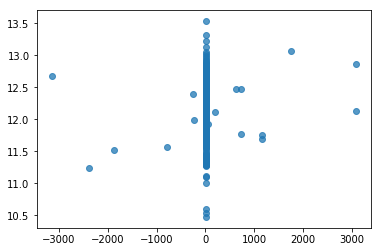

In [80]:
print('R squared=',model.score(x_test,y_test))

predictions=model.predict(x_test)
print('RMSE',mean_squared_error(y_test,predictions))


actual_vals=y_test
plt.scatter(predictions, actual_vals,alpha=.75)
plt.xlabel='Predicted Sale Price'

plt.ylabel='Actual Sale Price'

In [81]:
#0.729 jos bolje bilo 0.725

#prvo ne znam drugo 0.0445

In [82]:
test_data.drop('SalePrice',axis=1,inplace=True)

C:\Users\dusic\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [83]:
rm=linear_model.Ridge(alpha=10**2)
ridge_model=rm.fit(x_train,y_train)
predictions_ridge=ridge_model.predict(test_data.drop(['Id'],axis=1))


submission=pd.DataFrame()
submission['Id']=test_data.Id

#features=test_data.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

untransformed_preds=np.exp(predictions_ridge)

print(predictions[:5],untransformed_preds[:5])

submission['SalePrice']=untransformed_preds

[ 11.62701818 730.95648977  12.71142217  11.87094518  11.95895025] [116267.25126464 109449.03625129 179261.90663671 204005.10930998
 176878.01762491]


In [84]:
submission.head()

,Id,SalePrice
1460,1461,116267.251265
1461,1462,109449.036251
1462,1463,179261.906637
1463,1464,204005.109310
1464,1465,176878.017625


In [85]:
train_data.SalePrice

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1430    192140.0
1431    143750.0
1432     64500.0
1433    186500.0
1434    160000.0
1435    174000.0
1436    120500.0
1437    394617.0
1438    149700.0
1439    197000.0
1440    191000.0
1441    149300.0
1442    310000.0
1443    121000.0
1444    179600.0
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
1450    136000.0
1451    287090.0
1452    145000.0
1453     84500.0
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500

In [86]:
submission.to_csv('submission.csv',index=False)

In [87]:
#bilo je 2262---0.13932
